In [ ]:

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1]
])
Y = np.array([
    [0],
    [1],
    [1],
    [0],
    [1],
    [0],
    [0],
    [1]
])


In [ ]:
import numpy as np

class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 3
        hiddenLayerNeurons1 = 10
        hiddenLayerNeurons2 = 6
        outLayerNeurons = 1

        self.learning_rate = 0.002
        self.W_HI   = np.random.randn(inputLayerNeurons, hiddenLayerNeurons1)
        self.W_H1H2 = np.random.randn(hiddenLayerNeurons1, hiddenLayerNeurons2)
        self.W_OH   = np.random.randn(hiddenLayerNeurons2, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        X = np.array(X, ndmin=2)
        self.h1 = self.sigmoid(np.dot(X, self.W_HI))
        self.h2 = self.sigmoid(np.dot(self.h1, self.W_H1H2))
        pred = self.sigmoid(np.dot(self.h2, self.W_OH))
        return pred

    def backPropagation(self, X, Y, pred):
        X = np.array(X, ndmin=2)
        Y = np.array(Y, ndmin=2)


        out_err   = Y - pred
        out_delta = self.learning_rate * out_err * self.sigmoid(pred, der=True)


        h2_err   = np.dot(out_delta, self.W_OH.T)
        h2_delta = self.learning_rate * h2_err * self.sigmoid(self.h2, der=True)


        h1_err   = np.dot(h2_delta, self.W_H1H2.T)
        h1_delta = self.learning_rate * h1_err * self.sigmoid(self.h1, der=True)


        self.W_OH   += np.dot(self.h2.T, out_delta)
        self.W_H1H2 += np.dot(self.h1.T, h2_delta)
        self.W_HI   += np.dot(X.T, h1_delta)

    def train(self, X, Y):
        pred = self.feedForward(X)
        self.backPropagation(X, Y, pred)


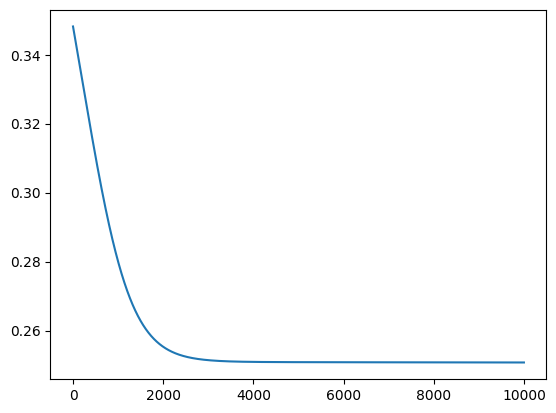

In [ ]:

NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.train(X,Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)

In [ ]:

print(NN.feedForward([0,0,0]))

[[0.4839677]]


In [ ]:
print(NN.feedForward([0,0,1]))

[[0.50074835]]


In [ ]:

print(NN.feedForward([0,1,0]))

[[0.48936744]]


In [ ]:
print(NN.feedForward([0,1,1]))

[[0.51383749]]


In [ ]:
print(NN.feedForward([1,0,0]))

[[0.49257753]]


In [ ]:
print(NN.feedForward([1,0,1]))

[[0.51920812]]


In [ ]:
print(NN.feedForward([1,1,0]))

[[0.49049603]]


In [ ]:
print(NN.feedForward([1,1,1]))

[[0.52018233]]
